In [1]:
import os, sys
sys.path.insert(0, '..')

In [2]:
#Import discrepancies
import json
import pandas as pd
import numpy as np
import re
#import csv

In [3]:
# Import file
file_dir=r'C:\Users\luzma\OneDrive\Desktop\Homework\Movies-ETL'
# f'{file_dir}filename'

In [4]:
with open (f'{file_dir}/wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)

In [5]:
len(wiki_movies_raw)

7311

In [6]:
# First 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [7]:
# Last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [8]:
# Some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [9]:
# REading imported data
kaggle_metadata = pd.read_csv(f'{file_dir}/movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}/ratings_small.csv')

In [10]:
# Sampling the df; head, tail, sample
kaggle_metadata.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [11]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [12]:
kaggle_metadata.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0
45465,False,NaN,0,[],NaN,461257,tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,...,2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0


In [13]:
ratings.tail()

,userId,movieId,rating,timestamp
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663
100003,671,6565,3.5,1074784724


In [14]:
kaggle_metadata.sample(n=5)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
35751,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 16, 'name...",NaN,24154,tt1092385,ja,ミヨリの森,"After being deserted by her parents, 11-year o...",...,2007-08-25,0.0,107.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,Miyori's Forest,False,8.0,5.0
37751,False,NaN,0,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,34158,tt1156524,en,The People Speak,"A look at America's struggles with war, class,...",...,2009-12-13,0.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,The People Speak,False,8.0,3.0
21233,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,173210,tt2033981,en,Downloaded,A documentary that explores the downloading re...,...,2013-06-20,0.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Napster: The Music. The Battle. The Revolution.,Downloaded,False,6.6,37.0
43301,False,"{'id': 117777, 'name': 'Undisputed Collection'...",0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,348893,tt3344680,en,Boyka: Undisputed IV,In the fourth installment of the fighting fran...,...,2016-08-01,0.0,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Boyka is back!,Boyka: Undisputed IV,False,5.8,333.0
5096,False,"{'id': 456980, 'name': 'The Paleface Collectio...",0,"[{'id': 35, 'name': 'Comedy'}, {'id': 37, 'nam...",NaN,17804,tt0040679,en,The Paleface,Bob Hope stars in this laugh-packed wild west ...,...,1948-12-24,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Like Merry Xmas and Happy New Year...They belo...,The Paleface,False,6.0,17.0


In [15]:
ratings.sample(n=5)

,userId,movieId,rating,timestamp
54909,394,926,3.0,1297525299
19661,130,3703,4.5,1139000232
27489,200,2496,4.0,1437934263
20708,140,104374,4.0,1398069369
845,12,1387,4.0,968045475


In [16]:
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [18]:
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie) 
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [19]:
movies_df = pd.DataFrame(wiki_movies)
movies_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Hepburn,Literally,Cantonese,Chinese,Yiddish,Arabic,Romanized,Russian,Hebrew,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
movies_df.count()

url            7076
year           7076
imdb_link      7076
title          7075
Directed by    7074
               ... 
Arabic            2
Romanized         2
Russian           1
Hebrew            1
Polish            1
Length: 75, dtype: int64

In [21]:
# Function to make copy of movie and return it
def clean_movie(movie):
    movie_copy = dict(movie) #create a non-destructive copy
    return movie

In [22]:
wiki_movies_df[wiki_movies_df['Arabic'].notnull()]['url']

7060    https://en.wikipedia.org/wiki/The_Insult_(film)
7293     https://en.wikipedia.org/wiki/Capernaum_(film)
Name: url, dtype: object

In [23]:
sorted(wiki_movies_df.columns.tolist())

['Actor control',
 'Adaptation by',
 'Alias',
 'Alma mater',
 'Also known as',
 'Animation by',
 'Arabic',
 'Area',
 'Area served',
 'Artist(s)',
 'Attraction type',
 'Audio format',
 'Author',
 'Based on',
 'Biographical data',
 'Bopomofo',
 'Born',
 'Box office',
 'Budget',
 'Camera setup',
 'Cantonese',
 'Characters',
 'Children',
 'Chinese',
 'Cinematography',
 'Closing date',
 'Color process',
 'Comics',
 'Composer(s)',
 'Coordinates',
 'Country',
 'Country of origin',
 'Cover artist',
 'Created by',
 'Date premiered',
 'Designer(s)',
 'Developed by',
 'Developer(s)',
 'Dewey Decimal',
 'Died',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Divisions',
 'Duration',
 'Edited by',
 'Editor(s)',
 'Ending theme',
 'Engine',
 'Engine(s)',
 'Executive producer(s)',
 'Family',
 'Fate',
 'Film(s)',
 'Followed by',
 'Format(s)',
 'Formerly',
 'Founded',
 'Founder',
 'Founders',
 'French',
 'Full name',
 'Gender',
 'Genre',
 'Genre(s)',
 'Genres',
 'Gwoyeu Romatzyh',
 'Ha

In [24]:
# Make an empty dict to fold all of the alternative titles.
def clean_movie(movie):
    movie = dict(movie)  #create a non-destructive copy
    alt_titles = {}
    return movie

In [25]:
# Loop through a list of all alt title keys
def clean_movie(movie):
    movie = dict(movie)  #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        return movie

In [26]:
# Check if the current key exists in the movie object
def clean_movie(movie):
    movie = dict(movie)  #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in momvie:

            return movie

In [27]:
# If so, remove the key_value pair and add to the alt titles dict.
def clean_movie(movie):
    movie = dict(movie)  #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
        return movie

In [28]:
# After looping through every key, add the alt titles dict to the movie obj.
def clean_movie(movie):
    movie = dict(movie)  #create a non-destructive copy
    alt_titles = {}
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
        return movie

In [29]:
# Make list of cleaned movies
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [30]:
# Create DataFrame for clean_movies, print out columns
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Adaptation by',
 'Animation by',
 'Arabic',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cantonese',
 'Chinese',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Directed by',
 'Director',
 'Distributed by',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'French',
 'Genre',
 'Hangul',
 'Hebrew',
 'Hepburn',
 'Japanese',
 'Label',
 'Language',
 'Length',
 'Literally',
 'Mandarin',
 'McCune–Reischauer',
 'Music by',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Original title',
 'Picture format',
 'Polish',
 'Preceded by',
 'Produced by',
 'Producer',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Released',
 'Revised Romanization',
 'Romanized',
 'Running time',
 'Russian',
 'Screen story by',
 'Screenplay by',
 'Simplified',
 'Starring',
 

In [31]:
def clean_movie(movie):
    movie = dict(movie)  #create a non-destructive copy
    alt_titles = {}
    #combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune–Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
        if len(alt_titles) > 0:
            movie['alt_titles'] = alt_titles

# Consolidating column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Directed by', 'Director')
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('COuntry of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Length', 'Running time')
    change_column_name('Original Release', 'Release Date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer')
    change_column_name('Producer', 'Procuder(s)')
    change_column_name('Productioncompanies', 'Production company(s)')
    change_column_name('Productioncompany', 'Productions company(s)')
    change_column_name('Released', 'Release date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')
    return movie

In [32]:
clean_movies = [clean_movie(movie) for movie in wiki_movies]

In [33]:
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Country of origin',
 'Created by',
 'Director',
 'Distributor',
 'Edited by',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Original release',
 'Picture format',
 'Preceded by',
 'Procuder(s)',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Productioncompanies ',
 'Productioncompany ',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [34]:
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7076
7033


,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Edited by,Productioncompany,...,Created by,Preceded by,Suggested by,alt_titles,Recorded,Venue,Label,Animation by,Color process,imdb_id
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,Michael Tronick,Silver Pictures,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098987
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,Howard E. Smith,Avenue Pictures,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0098994
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[John Bloom, Lois Freeman-Fox]","[Carolco Pictures, IndieProd Company]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099005
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,Susan E. Morse,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099012
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,David Stiven,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0099018


In [35]:
# List comprehension, way to count null values for ea column
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]


[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Edited by', 694],
 ['Productioncompany ', 2532],
 ['Release date', 191],
 ['Running time', 139],
 ['Country', 388],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Composer(s)', 518],
 ['Procuder(s)', 358],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Country of origin', 6881],
 ['Original language(s)', 6875],
 ['Producer(s)', 6877],
 ['Editor(s)', 6887],
 ['Production company(s)', 6902],
 ['Original network', 6908],
 ['Original release', 6874],
 ['Productioncompanies ', 6310],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Lab

In [36]:
# List of columns with less than 90% null values
[column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]

['url',
 'year',
 'imdb_link',
 'title',
 'Based on',
 'Starring',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Director',
 'Distributor',
 'Composer(s)',
 'Procuder(s)',
 'Writer(s)',
 'Productioncompanies ',
 'imdb_id']

In [37]:
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]

In [38]:
# Checking box office data and budget
box_office = wiki_movies_df['Box office'].dropna()
len(box_office)

5485

In [39]:
# Checking for data that is not a string
def is_not_a_string(x):
    return type(x) !=str
box_office[box_office.map(is_not_a_string)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [40]:
# Lambda version
lambda x: type(x) !=str
# use map() to use the mabda function
box_office[box_office.map(lambda x: type(x) !=str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [41]:
# Applying join() function 
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [42]:
print(box_office)

0          $21.4 million
1           $2.7 million
2            $57,718,089
3             $7,331,647
4       $6,939,946 (USA)
              ...       
7070       $19.4 million
7071       $41.9 million
7072       $76.1 million
7073       $38.4 million
7074        $5.5 million
Name: Box office, Length: 5485, dtype: object


In [43]:
# Regular expressions
form_one = r'\$\d+\.?\d*\s*[mb]illion'
box_office.str.contains(form_one, flags=re.IGNORECASE).sum()

3896

In [44]:
form_two = r'\$\d{1,3}(?:,\d{3})+'
box_office.str.contains(form_two, flags=re.IGNORECASE).sum()

1544

In [45]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE)

# this will throw an error!
box_office[~matches_form_one & ~matches_form_two]

34                         US$ 4,212,828
79                              $335.000
110                   $4.35-4.37 million
130                        US$ 4,803,039
600                           $5000 (US)
731                         $ 11,146,270
957                             $ 50,004
1070                          35,254,617
1147    $ 407,618 (U.S.) (sub-total) [1]
1446                        $ 11,829,959
1480                          £3 million
1611                            $520.000
1865                        ¥1.1 billion
2032                                 N/A
2091                                $309
2130               US$ 171.8 million [9]
2257                   US$ 3,395,581 [1]
2263            $ 1,223,034 ( domestic )
2347                            $282.175
2638            $ 104,883 (US sub-total)
2665         926,423 admissions (France)
2697      $ 1.7 million (US) (sub-total)
2823                            $414.000
2924                            $621.000
3088           $

In [46]:
# Some values have spaces between the $ and the number
form_one = r'\$\s*\d+\.?\d*\s*[mb]illion'
form_two = r'\$\s*\d{1,3}(?:,\d{3})+'

In [47]:
# Some values use a period as thousands separator, not a comma
form_two =  r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'

In [48]:
# Some values are given as a range
box_office = box_office.str.replace(r'\$.*[---](?![a-z])','$', regex=True)

C:\Users\luzma\anaconda3\envs\PythonData\lib\site-packages\pandas\core\strings\object_array.py:160: FutureWarning: Possible set difference at position 6
  compiled = re.compile(pat, flags=flags)


In [49]:
# "Million" is sometimes misspelled as "milon"
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'

In [50]:
# Extracting and converting box office values
box_office.str.extract(f'({form_one}|{form_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
...,...
7070,$19.4 million
7071,$41.9 million
7072,$76.1 million
7073,$38.4 million


In [51]:
def parse_dollars(s):
    #if s is not a string, return NaN
    if type(s) !=str:
        return np.nan
    
    #if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):
        
        # remove dollar sign and "million"
        s = re.sub('\$|\s|[a-zA-Z]','',s)
        
        #convert to float and multiply by a million
        value = float(s) * 10**6
        
        # return value
        return value
        
    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):
        
        # remove dollar sign and "billion"
        s = re.sub('\$|\s|[a-zA-Z]', '', s)
        
        # convert to float and multiply by a billion
        value = float(s) * 10**9
        
        # retun value
        return value
        
    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):
        
        # remove dollar sign and commas
        s = re.sub('\$|,','',s)
        
        # convert to float
        value = float(s)
        
        # return value
        return value        
    
    # otherwise, return NaN
    else:
        return np.nan

In [52]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [53]:
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [54]:
# Drop "Box Office," we no longer need it
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [55]:
# Creating budget variable
budget = wiki_movies_df['Budget'].dropna()

In [56]:
# Converting any lists to strings
budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

In [57]:
# Removing any values between a dollar sign and hyphen
budget = budget.str.replace(r'\$.*[---](?![a-z])', '$', regex=True)

In [58]:
print(budget)

0        $20 million
1         $6 million
2        $35 million
3        $12 million
4        $25 million
            ...     
7070    €4.3 million
7071     $42 million
7072     $60 million
7073     $20 million
7074      $9 million
Name: Budget, Length: 4738, dtype: object


In [59]:
# Parsing the budget info and apply these without modification back to budget
matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE)
budget[~matches_form_one & ~matches_form_two]

110                     $5–7 million
136                          Unknown
196     $6.5–10 million [1] [Note 1]
204      60 million Norwegian Kroner
235                   $50–65 million
                    ...             
7062                $100–150 million
7066                $160–200 million
7067                $102–135 million
7068                  $39–50 million
7070                    €4.3 million
Name: Budget, Length: 230, dtype: object

In [60]:
# Remove the citation references with the following.

budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

C:\Users\luzma\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


110                    $5–7 million
136                         Unknown
196        $6.5–10 million [Note 1]
204     60 million Norwegian Kroner
235                  $50–65 million
                   ...             
7062               $100–150 million
7066               $160–200 million
7067               $102–135 million
7068                 $39–50 million
7070                   €4.3 million
Name: Budget, Length: 230, dtype: object

In [61]:
# Parse budget values
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)

In [62]:
print(budget)

0        $20 million
1         $6 million
2        $35 million
3        $12 million
4        $25 million
            ...     
7070    €4.3 million
7071     $42 million
7072     $60 million
7073     $20 million
7074      $9 million
Name: Budget, Length: 4738, dtype: object


In [63]:
# Drop original Budget column
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [64]:
# Parsing release dates
# Make variable that holds non-null values of Release date, converting to lists of strings
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [65]:
# Parsing through data in 4 functions
date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'/d{4}'

In [66]:
# Extract dates
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

,0
0,"July 11, 1990"
1,"May 17, 1990"
2,"August 10, 1990"
3,"December 25, 1990"
4,"December 19, 1990"
...,...
7071,"December 25, 2018"
7072,"December 11, 2018"
7073,"December 25, 2018"
7074,"August 31, 2018"


In [67]:
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)

In [68]:
# Parsing running time, making variable that hold non-null values and release date in the DF
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

In [69]:
print(running_time)

0                                 102 minutes
1                                 114 minutes
2                                 113 minutes
3                                 106 minutes
4                                  95 minutes
                        ...                  
7071                               90 minutes
7072                              132 minutes
7073                              120 minutes
7074                              123 minutes
7075    Variable; 90 minutes for default path
Name: Running time, Length: 6894, dtype: object


In [70]:
# Using string boundaries fing how many running times look exactly alike
running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE).sum()

6528

In [71]:
# what's the time frame of the other films
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE) !=True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [72]:
# make general by marking beginning of string and accepting abbreviations
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE).sum()

6877

In [73]:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE) !=True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [74]:
# Parsing running times over 100min
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

In [75]:
print(running_time_extract)

        0    1    2
0     NaN  NaN  102
1     NaN  NaN  114
2     NaN  NaN  113
3     NaN  NaN  106
4     NaN  NaN   95
...   ...  ...  ...
7071  NaN  NaN   90
7072  NaN  NaN  132
7073  NaN  NaN  120
7074  NaN  NaN  123
7075  NaN  NaN   90

[6894 rows x 3 columns]


In [76]:
# Converting running_time_extract to numeric values
running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

In [77]:
# Function to convert hour capture groups & min capture groups to minutes.
wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)

In [78]:
# Drop running time
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [79]:
# Checking datatypes in Kaggle csv
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [80]:
# Converting data
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

In [81]:
# Removing bad data
kaggle_metadata[~kaggle_metadata['adult'].isin(['True', 'False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# Drop adult column
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [83]:
# Review values in video column
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [84]:
# Converting video
kaggle_metadata['video'] == 'True'

0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [85]:
# Assign back to video
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [86]:
# COnverting numeric columns
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [87]:
# convert Release Date to datetime
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [88]:
# Review ratings, set null_counts to True
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


C:\Users\luzma\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


In [89]:
ratings.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [90]:
# Specifi datetime in unix
pd.to_datetime(ratings['timestamp'], unit='s')

0        2009-12-14 02:52:24
1        2009-12-14 02:52:59
2        2009-12-14 02:53:02
3        2009-12-14 02:53:05
4        2009-12-14 02:53:25
                 ...        
99999    2003-10-08 02:16:10
100000   2003-10-03 02:46:41
100001   2003-12-09 03:26:03
100002   2003-12-09 14:21:03
100003   2004-01-22 15:18:44
Name: timestamp, Length: 100004, dtype: datetime64[ns]

In [91]:
# Assign to timestamp column
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

count             100,004.00
mean                    3.54
std                     1.06
min                     0.50
25%                     3.00
50%                     4.00
75%                     4.00
max                     5.00
Name: rating, dtype: float64

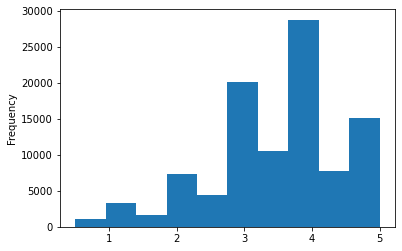

In [92]:
# Histogram of ratings
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

In [93]:
# Reconcile both data sets, print out list of columns
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])

In [94]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle              Drop Wikipedia
# running_time             runtime              Keep Kaggle; fill in zeros w/Wikipedia data
# budget_wiki              budget_kaggle        Keep Kaggle; fill in zeros w/Wikipedia data
# box_office               revenue              Keep Kaggle; fill in zeros w/Wikipedia data
# release_date_wiki        release_date_kaggle       Drop Wikipedia
# Language                 original_language         Drop Wikipedia
# Production company(s)    production_companies      Drop Wikipedia

In [95]:
# Comparing title
movies_df[['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
0,The Adventures of Ford Fairlane,The Adventures of Ford Fairlane
1,"After Dark, My Sweet","After Dark, My Sweet"
2,Air America,Air America
3,Alice,Alice
4,Almost an Angel,Almost an Angel
...,...,...
6047,A Fantastic Woman,A Fantastic Woman
6048,Permission,Permission
6049,Loveless,Loveless
6050,Gemini,Gemini


In [96]:
# Rows where titles don't match
movies_df[movies_df['title_wiki'] !=movies_df['title_kaggle']][['title_wiki','title_kaggle']]

,title_wiki,title_kaggle
27,China Cry,China Cry: A True Story
36,Daddy's Dyin' ...Who's Got the Will?,Daddy's Dyin'... Who's Got the Will?
38,The Dark Side of the Moon,The Dark Side of The Moon
42,Delta Force 2,Delta Force 2: The Colombian Connection
48,DuckTales the Movie:Treasure of the Lost Lamp,DuckTales: The Movie - Treasure of the Lost Lamp
...,...,...
5956,Chips,CHiPS
5971,Spark,Spark: A Space Tail
5994,Pirates of the Caribbean:Dead Men Tell No Tales,Pirates of the Caribbean: Dead Men Tell No Tales
6023,Valerian and the Cityof a Thousand Planets,Valerian and the City of a Thousand Planets


In [97]:
# Show any rows where titles_kaggle is empty
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Edited by,Productioncompany,Release date,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


<AxesSubplot:xlabel='running_time', ylabel='runtime'>

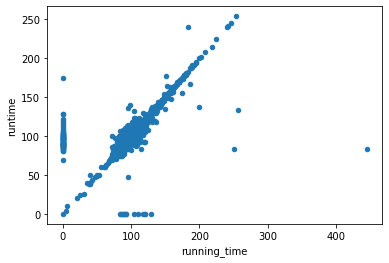

In [98]:
# Scatter plotting to view deficiencies in running_time and runtime
# Filling in missing values with zero
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

<AxesSubplot:xlabel='budget_wiki', ylabel='budget_kaggle'>

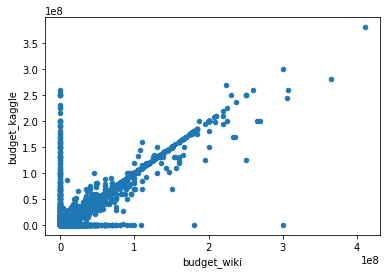

In [99]:
# Scatter plot for budget
movies_df.fillna(0).plot(x='budget_wiki',y='budget_kaggle', kind='scatter')

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

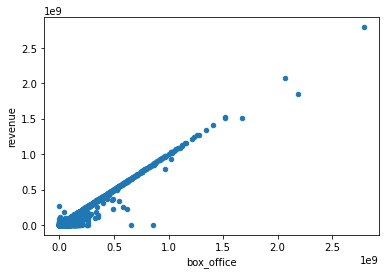

In [100]:
# SCatter plot for box_office
movies_df.fillna(0).plot(x='box_office',y='revenue', kind='scatter')

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

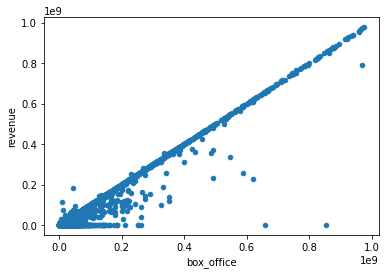

In [101]:
# Box office revenue for less than $1Billion
movies_df.fillna(0)[movies_df['box_office'] < 10**9].plot(x='box_office',y='revenue', kind='scatter')

<AxesSubplot:xlabel='release_date_wiki'>

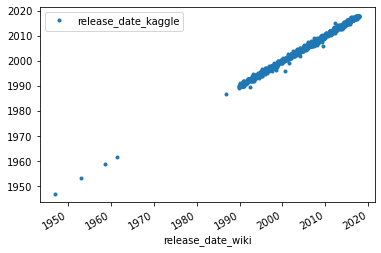

In [102]:
# Line plot for release date
movies_df[['release_date_wiki','release_date_kaggle']].plot(x='release_date_wiki', y='release_date_kaggle', style='.')

In [103]:
# Searching for outlier in 2006
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Edited by,Productioncompany,Release date,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count


In [104]:
# Drop the row from dataframce, with index
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index

# Then drop the row
# movies_df = movies_dfdrop(movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1995-01-01')].index)

Int64Index([], dtype='int64')

In [105]:
# Checking if there are any null values
movies_df[movies_df['release_date_wiki'].isnull()]

,url,year,imdb_link,title_wiki,Based on,Starring,Cinematography,Edited by,Productioncompany,Release date,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
6,https://en.wikipedia.org/wiki/American_Dream_(...,1990,https://www.imdb.com/title/tt0099028/,American Dream,NaN,NaN,"[Tom Hurwitz, Mathieu Roberts, Nesya Shapiro]","[Cathy Caplan, Thomas Haneke, Lawrence Silk]","[Cabin Creek, Catholic Communication Campaign,...","[October 6, 1990, (, 1990-10-06, ), (, New Yor...",...,1990-09-28,"269,823.00",98.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"The award-winning film of American lives, Amer...",American Dream,False,6.00,2.00
7,https://en.wikipedia.org/wiki/American_Ninja_4...,1990,https://www.imdb.com/title/tt0101326/,American Ninja 4: The Annihilation,NaN,"[Michael Dudikoff, David Bradley, James Booth,...",NaN,NaN,NaN,"[March 8, 1991, (, 1991-03-08, )]",...,1990-10-30,0.00,99.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,American Ninja 4: The Annihilation,False,4.80,31.00
8,https://en.wikipedia.org/wiki/Another_48_Hrs.,1990,https://www.imdb.com/title/tt0099044/,Another 48 Hrs.,"[Characters by, Roger Spottiswoode, Walter Hil...","[Eddie Murphy, Nick Nolte, Brion James, Ed O'R...",Matthew F. Leonetti,"[Donn Aron, Carmel Davies, Freeman A. Davies, ...",Eddie Murphy Productions,"[June 8, 1990, (, 1990-06-08, )]",...,1990-06-08,"153,518,974.00",95.00,"[{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}, {'i...",Released,The boys are back in town.,Another 48 Hrs.,False,5.80,205.00
10,https://en.wikipedia.org/wiki/Avalon_(1990_film),1990,https://www.imdb.com/title/tt0099073/,Avalon,NaN,"[Armin Mueller-Stahl, Elizabeth Perkins, Joan ...",Allen Daviau,Stu Linder,Baltimore Pictures,"[October 5, 1990, (, 1990-10-05, ), (United St...",...,1990-10-05,0.00,126.00,"[{'iso_639_1': 'yi', 'name': ''}, {'iso_639_1'...",Released,Three generations of family. They shared a dre...,Avalon,False,6.00,19.00
13,https://en.wikipedia.org/wiki/Bad_Influence_(f...,1990,https://www.imdb.com/title/tt0099091/,Bad Influence,NaN,"[Rob Lowe, James Spader]",Robert Elswit,Bonnie Koehler,Epic Productions,"March 9, 1990",...,1990-03-09,0.00,99.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Bad Influence,False,5.80,35.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,https://en.wikipedia.org/wiki/Gifted_(2017_film),2017,https://www.imdb.com/title/tt4481414/,Gifted,NaN,"[Chris Evans, Mckenna Grace, Lindsay Duncan, J...",Stuart Dryburgh,Bill Pankow,"[TSG Entertainment, FilmNation Entertainment, ...","[April 7, 2017, (, 2017-04-07, ), (United Stat...",...,2017-04-12,"37,461,045.00",101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Gifted,False,7.70,549.00
5969,https://en.wikipedia.org/wiki/Aftermath_(2017_...,2017,https://www.imdb.com/title/tt4581576/,Aftermath,NaN,"[Arnold Schwarzenegger, Scoot McNairy, Maggie ...",Pieter Vermeer,Nicholas Wayman-Harris,"[Emmett/Furla/Oasis Films, Pacific View Manage...","[April 7, 2017, (, 2017-04-07, )]",...,2017-04-06,"3,451.00",92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All he had left was revenge,Aftermath,False,5.80,162.00
6000,https://en.wikipedia.org/wiki/My_Cousin_Rachel...,2017,https://www.imdb.com/title/tt4411596/,My Cousin Rachel,"[My Cousin Rachel, by, Daphne du Maurier]","[Rachel Weisz, Sam Claflin, Iain Glen, Hollida...",Mike Eley,Kristina Hetherington,"[Fox Searchlight Pictures, Free Range Films]","[June 9, 2017, (, 2017-06-09, )]",...,2017-06-08,"2,676,077.00",106.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,My Cousin Rachel,False,5.70,91.00
6001,https://en.wikipedia.org/wiki/Megan_Leavey_(film),2017,https://www.imdb.com/title/tt4899370/,Megan Leavey,NaN,"[Kate Mara, Ramón Rodríguez, Tom Felton, Bradl...",Lorenzo Senatore,Peter McNulty,LD Entertainment,"[June 5, 2017, (, 2017-06-05, ), (, Yankee Sta...",...,2017-06-09,0.00,116.00,"[{'iso_

In [106]:
# COnvert lists to tuples
movies_df['Language'].apply(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False)

# Language date, compare values to each other
#movies_df['Language'].value_counts()

English                                                     5480
NaN                                                          134
(English, Spanish)                                            68
(English, French)                                             35
(English, Japanese)                                           25
                                                            ... 
(English, Spanish, [1])                                        1
(English, Greek, Italian)                                      1
(English, Afrikaans, Maori, Zulu, Xhosa, Southern Sotho)       1
(Japanese, English)                                            1
(English, German, Dutch)                                       1
Name: Language, Length: 198, dtype: int64

In [107]:
# Language in Kaggle
movies_df['original_language'].value_counts(dropna=False)

en    5988
fr      16
es      10
it       8
de       6
ja       4
zh       4
pt       4
hi       2
da       2
tr       1
ko       1
ru       1
ar       1
he       1
ab       1
sv       1
cn       1
Name: original_language, dtype: int64

In [108]:
colnames = list(movies_df.columns)
movies_df = movies_df.reindex(columns=colnames)

In [109]:
# Production companies, a small number
movies_df[['Productioncompany ','Productioncompanies ','production_companies']]

,Productioncompany,Productioncompanies,production_companies
0,Silver Pictures,NaN,[{'name': 'Twentieth Century Fox Film Corporat...
1,Avenue Pictures,NaN,"[{'name': 'Avenue Pictures Productions', 'id':..."
2,"[Carolco Pictures, IndieProd Company]",NaN,"[{'name': 'IndieProd Company Productions', 'id..."
3,NaN,NaN,"[{'name': 'Orion Pictures', 'id': 41}]"
4,NaN,NaN,"[{'name': 'Paramount Pictures', 'id': 4}]"
...,...,...,...
6047,"[Fabula, Komplizen Film]",NaN,"[{'name': 'Komplizen Film', 'id': 1618}, {'nam..."
6048,Ball & Chain Productions,NaN,"[{'name': 'Ball & Chain Productions', 'id': 74..."
6049,"[Arte France Cinéma, Why Not Productions]",NaN,"[{'name': 'ARTE France Cinéma', 'id': 94}, {'n..."
6050,NaN,"[Film Science, Rough House Pictures, Syncopate...","[{'name': 'Film Science', 'id': 1976}, {'name'..."


In [110]:
movies_df.columns

Index(['url', 'year', 'imdb_link', 'title_wiki', 'Based on', 'Starring',
       'Cinematography', 'Edited by', 'Productioncompany ', 'Release date',
       'Country', 'Language', 'Director', 'Distributor', 'Composer(s)',
       'Procuder(s)', 'Writer(s)', 'Productioncompanies ', 'imdb_id',
       'box_office', 'budget_wiki', 'release_date_wiki', 'running_time',
       'belongs_to_collection', 'budget_kaggle', 'genres', 'homepage', 'id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date_kaggle', 'revenue', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title_kaggle', 'video', 'vote_average',
       'vote_count'],
      dtype='object')

In [111]:
# Put it all together; drop title_wiki, release_date_wiki, Language and Production Company
movies_df.drop(columns=['title_wiki','release_date_wiki','Language','Productioncompany ', 'Productioncompanies '], inplace=True)

In [112]:
# Function to fill in missing data
def fill_missing_kaggle_data(df, kaggle_column, wiki_column):
    df[kaggle_column] = df.apply(
        lambda row: row[wiki_column] if row[kaggle_column] == 0 else row[kaggle_column]
        , axis=1)
    df.drop(columns=wiki_column, inplace=True)

In [113]:
# Run function for 3 columns pairs to fill with zeros
fill_missing_kaggle_data(movies_df, 'runtime', 'running_time')
fill_missing_kaggle_data(movies_df, 'budget_kaggle', 'budget_wiki')
fill_missing_kaggle_data(movies_df, 'revenue', 'box_office')
movies_df

,url,year,imdb_link,Based on,Starring,Cinematography,Edited by,Release date,Country,Director,...,release_date_kaggle,revenue,runtime,spoken_languages,status,tagline,title_kaggle,video,vote_average,vote_count
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",Oliver Wood,Michael Tronick,"[July 11, 1990, (, 1990-07-11, )]",United States,Renny Harlin,...,1990-07-11,"20,423,389.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Kojak. Columbo. Dirty Harry. Wimps.,The Adventures of Ford Fairlane,False,6.20,72.00
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",Mark Plummer,Howard E. Smith,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",United States,James Foley,...,1990-08-24,"2,700,000.00",114.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,All they risked was everything.,"After Dark, My Sweet",False,6.50,17.00
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",Roger Deakins,"[John Bloom, Lois Freeman-Fox]","[August 10, 1990, (, 1990-08-10, )]",United States,Roger Spottiswoode,...,1990-08-10,"33,461,269.00",112.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The few. The proud. The totally insane.,Air America,False,5.30,146.00
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",Carlo Di Palma,Susan E. Morse,"[December 25, 1990, (, 1990-12-25, )]",United States,Woody Allen,...,1990-12-25,"7,331,647.00",102.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Alice,False,6.30,57.00
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",Russell Boyd,David Stiven,"December 19, 1990",US,John Cornell,...,1990-12-21,"6,939,946.00",95.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Who does he think he is?,Almost an Angel,False,5.60,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6047,https://en.wikipedia.org/wiki/A_Fantastic_Woman,2018,https://www.imdb.com/title/tt5639354/,NaN,"[Daniela Vega, Francisco Reyes]",Benjamín Echazarreta,Soledad Salfate,"[12 February 2017, (, 2017-02-12, ), (, Berlin...","[Chile, Germany, Spain, United States, [2]]",Sebastián Lelio,...,2017-04-06,"3,700,000.00",104.00,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,A Fantastic Woman,False,7.20,13.00
6048,https://en.wikipedia.org/wiki/Permission_(film),2018,https://www.imdb.com/title/tt5390066/,NaN,"[Rebecca Hall, Dan Stevens, Morgan Spector, Fr...",Adam Bricker,Matt Friedman,"[April 22, 2017, (, 2017-04-22, ), (, Tribeca ...",United States,Brian Crano,...,2017-04-22,NaN,96.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Permission,False,0.00,1.00
6049,https://en.wikipedia.org/wiki/Loveless_(film),2018,https://www.imdb.com/title/tt6304162/,NaN,"[Maryana Spivak, Aleksey Rozin, Matvey Novikov...",Mikhail Krichman,Anna Mass,"[18 May 2017, (, 2017-05-18, ), (, Cannes, ), ...","[Russia, France, Belgium, Germany, [3]]",Andrey Zvyagintsev,...,2017-06-01,"4,800,000.00",128.00,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Loveless,False,7.80,26.00
6050,https://en.wikipedia.org/wiki/Gemini_(2017_film),2018,https://www.imdb.com/title/tt5795086/,NaN,"[Lola Kirke, Zoë Kravitz, Greta Lee, Michelle ...",Andrew Reed,Aaron Katz,"[March 12, 2017, (, 2017-03-12, ), (, SXSW, ),...",United States,Aaron Katz,...,2017-03-12,"200,340.00",92.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Post Production,NaN,Gemini,False,0.00,0.00


In [114]:
for col in movies_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_df[col].apply(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    if num_values == 1:
        print(col)

video


In [115]:
movies_df['video'].value_counts(dropna=False)

False    6052
Name: video, dtype: int64

In [116]:
movies_df.columns

Index(['url', 'year', 'imdb_link', 'Based on', 'Starring', 'Cinematography',
       'Edited by', 'Release date', 'Country', 'Director', 'Distributor',
       'Composer(s)', 'Procuder(s)', 'Writer(s)', 'imdb_id',
       'belongs_to_collection', 'budget_kaggle', 'genres', 'homepage', 'id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date_kaggle', 'revenue', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title_kaggle', 'video', 'vote_average',
       'vote_count'],
      dtype='object')

In [117]:
# Reordering dataframe
movies_df = movies_df.loc[:, ['imdb_id','id','title_kaggle','original_title','tagline','belongs_to_collection','url','imdb_link',
                       'runtime','budget_kaggle','revenue','release_date_kaggle','popularity','vote_average','vote_count',
                       'genres','original_language','overview','spoken_languages','Country',
                       'production_companies','production_countries','Distributor',
                       'Procuder(s)','Director','Starring','Cinematography','Edited by','Writer(s)','Composer(s)','Based on'
                      ]]

In [118]:
# Renaming columns
movies_df.rename({'id':'kaggle_id',
                  'title_kaggle':'title',
                  'url':'wikipedia_url',
                  'budget_kaggle':'budget',
                  'release_date_kaggle':'release_date',
                  'Country':'country',
                  'Distributor':'distributor',
                  'Producer(s)':'producers',
                  'Director':'director',
                  'Starring':'starring',
                  'Cinematography':'cinematography',
                  'Editor(s)':'editors',
                  'Writer(s)':'writers',
                  'Composer(s)':'composers',
                  'Based on':'based_on'
                 }, axis='columns', inplace=True)

In [131]:
# Use groupby to take count of "moviesId" and "ratings"
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count() \
                .rename({'userId':'count'}, axis=1) \
                .pivot(index='movieId',columns='rating', values='count')
# Rename "userId" to "count"
# Pivot data so "movieId" is the index, columns are rating values, and rows will be counts


In [132]:
# Rename each column by addign "rating" to the beginning
rating_counts.columns = ['rating_' + str(col) for col in rating_counts.columns]

In [134]:
# Left merge of movies_df and ratings
movies_with_ratings_df = pd.merge(movies_df, rating_counts, left_on='kaggle_id', right_index=True, how='left')

In [ ]:
# Fill in empty values 
movies_with_ratings_df[rating_counts.columns] = movies_with_ratings_df[rating_counts]